<a href="https://colab.research.google.com/github/abukshenko/abukshenko.github.io/blob/main/Final_Work_Bukshenko_A_DA_114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дипломная работа по теме:
«Анализ продаж e-commerce магазина (поиск инсайтов, составление рекомендаций стейкхолдерам)».

Цели проекта:
Проведение комплексного анализа продаж интернет-магазина для выявления ключевых закономерностей, скрытых инсайтов и формирования практических рекомендаций, направленных на увеличение прибыли и оптимизацию бизнес-процессов. Результаты работы предназначены для ключевых стейкхолдеров - генерального директора и директора по маркетингу компании.

Основные задачи анализа:

1.	Оценка динамики продаж

    Анализ географического распределения для выявления наиболее перспективных рынков

    Исследование сезонных колебаний спроса
3.	ABC-анализ товарного ассортимента

    Классификация продуктов по степени их вклада в выручку

    Выявление ключевых товаров, требующих особого внимания
5.	RFM-сегментация клиентской базы

    Разделение покупателей на группы по степени их ценности для бизнеса

    Разработка персонализированных маркетинговых стратегий
7.	Выявление сезонных трендов

    Анализ продаж топ-10 позиций для определения цикличности спроса

    Подготовка рекомендаций по управлению запасами

Для исследования был взят датасет [TATA: Online Retail Dataset](https://www.kaggle.com/datasets/ishanshrivastava28/tata-online-retail-dataset/data) со статистикой продаж интернет-магазина.


Блок № 1
 Знакомство и очистка данных
__________________________________

In [ ]:
#подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
# настроил формат для более удобного восприятия
pd.set_option('display.float_format', '{:.2f}'.format)


In [ ]:
#df = pd.read_csv('Downloads/Online Retail Data Set.csv/Online Retail Data Set.csv', encoding='1251')

df = pd.read_csv('/content/Online1.csv', encoding='1251')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,01-12-2010 08:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.00,01-12-2010 08:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,01-12-2010 08:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,01-12-2010 08:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,01-12-2010 08:26,3.39,17850.00,United Kingdom


In [ ]:
df.info() # посмотрел информацию о столбцах, какие типы, сколько значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Описание полей

0. InvoiceNo - Номер счета-фактуры (Уникальный номер счета-фактуры который идентифицирует каждую транзакцию)
1. StockCode - Код акций (Уникальный код товара, который используется для идентификации конкретного продукта в системе)
2. Description - Описание (Описание товара )
3. Quantity - Количество (Количество единиц товара, купленных в рамках данной транзакции)
4. InvoiceDate - Дата счета-фактуры (Дата и время, когда была совершена покупка)
5. UnitPrice - Цена (Цена за единицу товара)
6. CustomerID - Идентификатор клиента (Уникальный идентификатор клиента, который позволяет отслеживать покупки конкретного клиента)
7. Country - Страна (Страна, из которой совершен заказ)

In [ ]:
df.describe()  # в столбце Quantity и UnitPrice присутствуют отрицательные значения, столбец количество мин и макс значения одинаковое за исключением знака -

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [ ]:
print(f"Минимальная дата: {df['InvoiceDate'].min()}, Максимальная дата: {df['InvoiceDate'].max()}") # определим макс и мин временного интервалы датафрейма
# месяц декабрь 2011г не полный

Минимальная дата: 01-02-2011 08:23, Максимальная дата: 31-10-2011 17:19


In [ ]:
nan_values = df.isna().sum() # посмотрел солько nan значений в df
duplicates = df.duplicated().sum() # посмотрел есть ли дубликаты и сколько их
unique_values = df.nunique() # посмотрел сколко уникальны значений в df

# создал df со словарем в нутри ключи + значения из переменны, для удобства
columns = pd.DataFrame({
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

columns

,nan_values,duplicates,unique_values
InvoiceNo,0,5268,25900
StockCode,0,5268,4070
Description,1454,5268,4223
Quantity,0,5268,722
InvoiceDate,0,5268,23260
UnitPrice,0,5268,1630
CustomerID,135080,5268,4372
Country,0,5268,38


Датафрейм содержит: дубликаты 5268 и пропуски в двух столбцах Description - 1454 и CustomerID - 135080. Дубликаты удалю, пропуски заполню.

In [ ]:
df = df.drop_duplicates() # удаляем дубликаты

In [ ]:
df['Description'] = df['Description'].fillna('unknown') # заменил nan значения в столбце на значение 'неизвестно'
df['CustomerID'] = df['CustomerID'].fillna(0) # заменил nan значения в столбце на значение 0

In [ ]:
nan_values = df.isna().sum() # посмотрел солько nan значений в df
duplicates = df.duplicated().sum() # посмотрел есть ли дубликаты и сколько их
unique_values = df.nunique() # посмотрел сколко уникальны значений в df

# Создал df со словарем в нутри ключи + значения из переменны, для удобства
columns = pd.DataFrame({
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

columns

,nan_values,duplicates,unique_values
InvoiceNo,0,0,25900
StockCode,0,0,4070
Description,0,0,4224
Quantity,0,0,722
InvoiceDate,0,0,23260
UnitPrice,0,0,1630
CustomerID,0,0,4373
Country,0,0,38


In [ ]:
check = df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False) # проверил на уникальность столбец Description, у некоторых позиций
print(check[check > 1].head())      # сток код имеет несколько названии, значит для дальнейшего анализа будем использовать StockCode а не Description

StockCode
20713    9
23084    8
85175    7
21830    7
23131    6
Name: Description, dtype: int64


In [ ]:
# преобразовал дату в удобный формат ( datetime64[ns]) для проведения анализа
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M", dayfirst=True)

# выделил месяц в отдельный столбец
df['Month'] = df['InvoiceDate'].dt.month_name()
# выделил год в отдельный столбец
df['Year']= df['InvoiceDate'].dt.year

# дополнительно преобразую столбецы в числовой формат
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

# рассчитываем общую стоимость каждой транзакции
df['Total'] = df['Quantity'] * df['UnitPrice']

Посмотрим на данные через Boxplot, возможно есть выбросы или аномальные значения, начну с суммы.

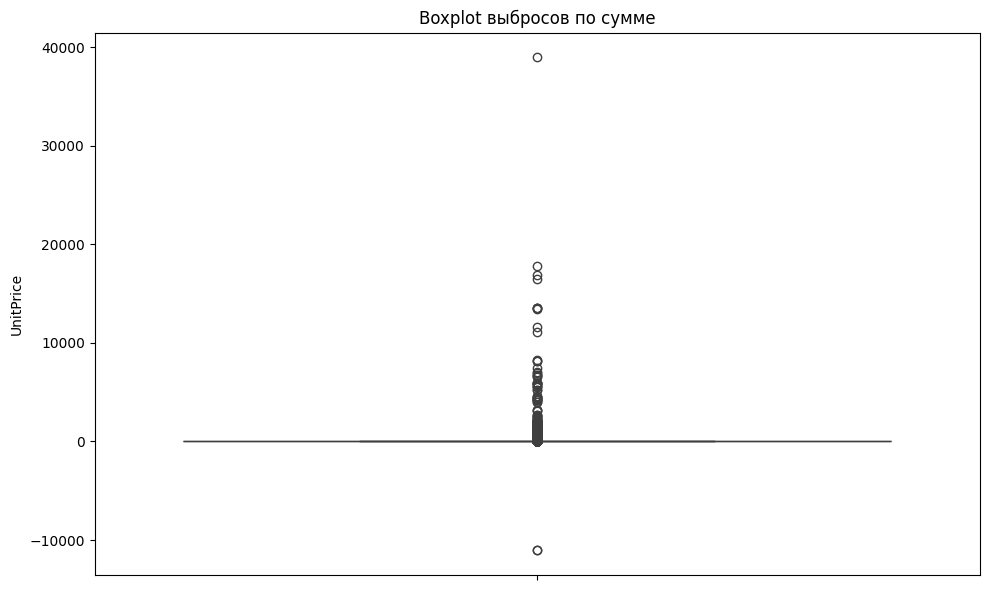

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='UnitPrice', data=df)
plt.title('Boxplot выбросов по сумме')
plt.tight_layout()
plt.show()

Boxplot показал пару значений которые выбиваются из общей картины, посмотрю подробнее что это за транзакции.

In [ ]:
df[df['UnitPrice'] < 0] # Adjust bad debt - корректировка долгов c отрицательным значением, посмотрю много ли таких их.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.00,United Kingdom,August,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.00,United Kingdom,August,2011,-11062.06


In [ ]:
df[df['Description'].str.contains('debt', case=False)] # посмотрел на все строчки в столбце Description содержащие слово долг, их оказалось не очень большое
#количество, можно от них избавиться

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,0.00,United Kingdom,August,2011,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.00,United Kingdom,August,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.00,United Kingdom,August,2011,-11062.06


In [ ]:
df[df['UnitPrice'] > 30000] # также взглянем на значение c самой высокой суммой, какая-то инструкция с отрицательным количеством и большой суммой,
#посмотрим хронологию по клиенту возможно это прояснить ситуацию

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom,June,2011,-38970.00


In [ ]:
df[df['CustomerID'] == 15098] # по информации по клиенту видно что он покупал какие-то куски от плетеных корзинок,
# как будто он хочет собрать плетенную корзинку и купил к своему набору инструкцию за бешеные деньги, очень похоже на ошибку
# в цене, также присутствует отрицательное количество на эту инструкцию.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098.00,United Kingdom,June,2011,297.00
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.00,United Kingdom,June,2011,38970.00
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom,June,2011,-38970.00
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.00,United Kingdom,June,2011,649.50
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098.00,United Kingdom,June,2011,-297.00


In [ ]:
mask = df['Description'].str.contains('debt', case=False) | (df['InvoiceNo'] == 'C556445') #избавился от строчек с задолженностями и убираем инструкцию
df = df[~mask]

Посмотрю на Boxplot по столбцу кол-во

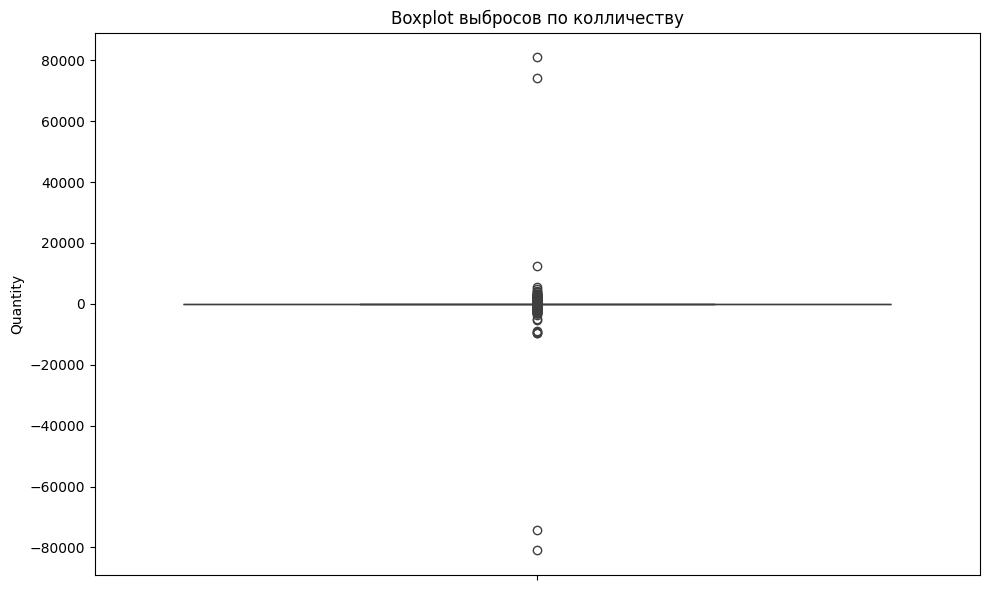

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Quantity', data=df)
plt.title('Boxplot выбросов по колличеству')
plt.tight_layout()
plt.show()

Boxplot показывает что в данных есть транзакции с отрицательным количеством, посмотри подробнее нечто это за транзакции.

In [ ]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom,December,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom,December,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom,December,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,December,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,December,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom,December,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom,December,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom,December,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom,December,2011,-1.25


Значений очень много, так просто от них не избавиться.
Это могут быть и возвраты и просто ошибки, а возможно клиент делал заказ, а товара просто не было на остатках...

In [ ]:
df[(df['Quantity'] < -60000) | (df['Quantity'] > 60000)] # посмотрел на данные которые выделяются по большому количеству

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom,January,2011,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom,January,2011,-77183.60
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom,December,2011,168469.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.00,United Kingdom,December,2011,-168469.60


Номер транзакции с отрицательным количеством начинается с C, это похоже на отмены или возвраты, при расчете общей суммы такие
транзакции будут компенсировать друг-друга.

In [ ]:
dfvn1 = df[~df['InvoiceNo'].str.contains('C', case=False) & (df['Quantity'] < 0)] #посмотрим отрицательные значения которые не начинаются на С
dfvn1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
2406,536589,21777,unknown,-10,2010-12-01 16:50:00,0.00,0.00,United Kingdom,December,2010,-0.00
4347,536764,84952C,unknown,-38,2010-12-02 14:42:00,0.00,0.00,United Kingdom,December,2010,-0.00
7188,536996,22712,unknown,-20,2010-12-03 15:30:00,0.00,0.00,United Kingdom,December,2010,-0.00
7189,536997,22028,unknown,-20,2010-12-03 15:30:00,0.00,0.00,United Kingdom,December,2010,-0.00
7190,536998,85067,unknown,-6,2010-12-03 15:30:00,0.00,0.00,United Kingdom,December,2010,-0.00
...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.00,0.00,United Kingdom,December,2011,-0.00
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,0.00,United Kingdom,December,2011,-0.00
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.00,0.00,United Kingdom,December,2011,-0.00
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,0.00,United Kingdom,December,2011,-0.00


In [ ]:
dfvn1.groupby('Country').agg({'Quantity' : 'sum', 'Total' : 'sum'}).sort_values(by='Total').reset_index()
# транзакции не содержат суммы и принадлежат одной стране UK

,Country,Quantity,Total
0,United Kingdom,-206957,0.00


In [ ]:
dfvn1['Description'].unique() # не очень понятные транзакции, словно списывали брак, эти данные я уберу из датафрейма для дальнейшего анализа

array(['unknown', '?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 

In [ ]:
df_to_keep = df[(df['InvoiceNo'].str.contains('C', case=False)) | (df['Quantity'] > 0)] # избавляемся от непонятных транзакций которые рассматривал выше
df = df_to_keep

In [ ]:
dfnv = df[(df['InvoiceNo'].str.contains('C', case=False)) & (df['Quantity'] < 0)]
dfnv # посмотрю на транзакции которые начинаются с С и имеют отрицательное количество

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom,December,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom,December,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom,December,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,December,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,December,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom,December,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom,December,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom,December,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom,December,2011,-1.25


In [ ]:
dfnv.groupby('Country').agg({'Quantity' : 'sum', 'Total' : 'sum'}).sort_values(by='Total').reset_index() # посмотрю много ли таких в разбивке по странам

,Country,Quantity,Total
0,United Kingdom,-261043,-773521.79
1,EIRE,-4786,-20147.14
2,France,-1623,-12308.26
3,Singapore,-7,-12158.90
4,Germany,-1815,-7168.93
5,Spain,-1127,-6802.53
6,Hong Kong,-4,-5574.76
7,Portugal,-78,-4380.08
8,Japan,-798,-2075.75
9,USA,-1424,-1849.47


Про транзакции у которые начинаются на С можно сказать что это отмены и возвраты, при расчет общих сумм они должны компенсировать друг друга, при сильной необходимости я могу их отделить от основного датафрейма.

Блок №2
 Анализ динамики продаж
 ______________________________________

Продажи с разбивкой по странам.

In [ ]:
# получил общую сумму по всем продажам для получения процента
total_revenue = df['Total'].sum()
# сделал групировку по странам и сумме
country_sales = df.groupby('Country')['Total'].sum().reset_index()
# сортируем
country_sales = country_sales.sort_values(by='Total', ascending=True)
# получил процент каждой страны по продажам от общей суммы
country_sales['Percentage'] = (country_sales['Total'] / total_revenue) * 100

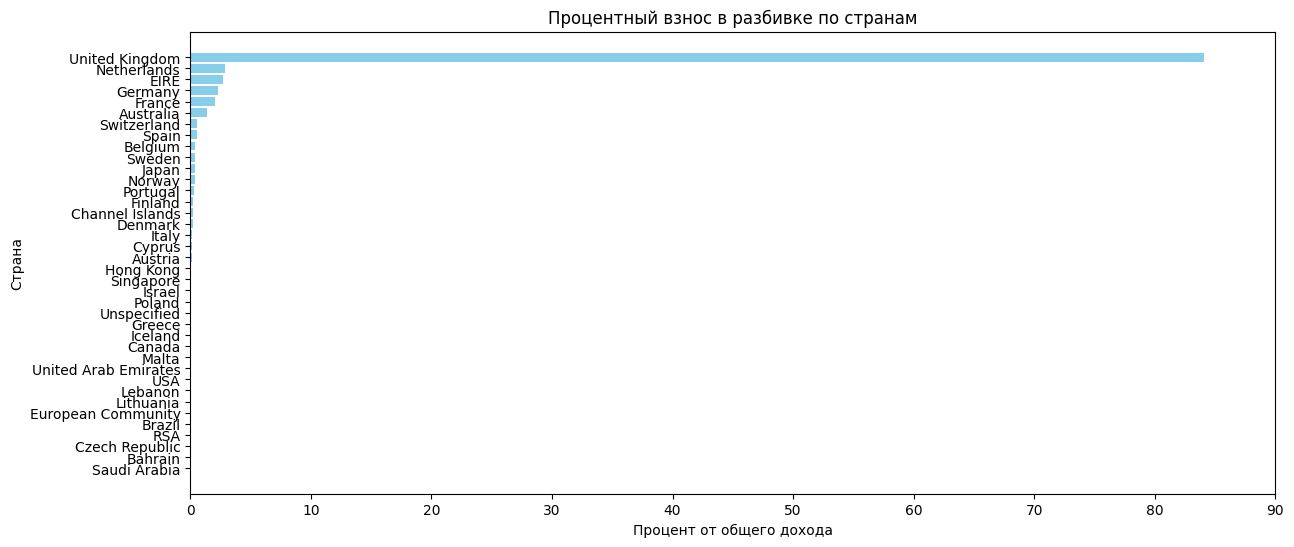

In [ ]:
# Создал боковую столбчатую диаграмму
plt.figure(figsize=(14, 6))
plt.barh(country_sales['Country'], country_sales['Percentage'], color='skyblue')
plt.xlabel('Процент от общего дохода')
plt.ylabel('Страна')
plt.title('Процентный взнос в разбивке по странам')
plt.xlim(0, 90)
plt.show()

Сделаем визуализацию более информативной, нивелируем различия масштаба уменьшив влияния сильного дисбаланса в данных (уберем подавляющую категорию UK).

In [ ]:
# отдельно сохраняем UK (чтобы не отображать на основном графике)
uk_data = country_sales[country_sales['Country'] == 'United Kingdom']
other_countries = country_sales[country_sales['Country'] != 'United Kingdom']

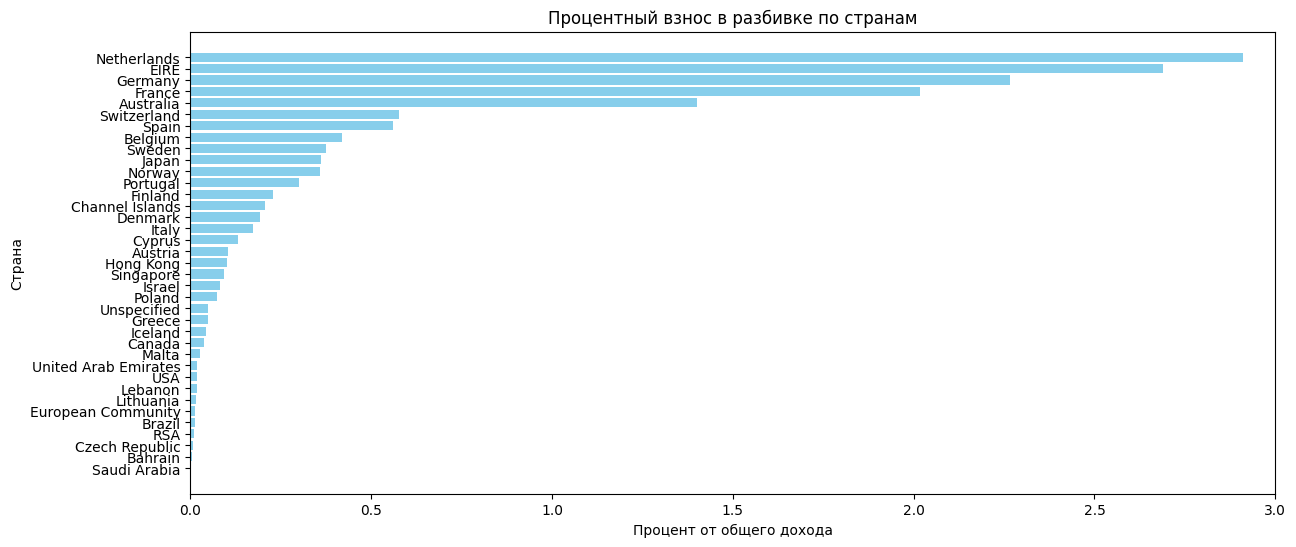

In [ ]:
# Создал боковую столбчатую диаграмму
plt.figure(figsize=(14, 6))
plt.barh(other_countries['Country'], other_countries['Percentage'], color='skyblue')
plt.xlabel('Процент от общего дохода')
plt.ylabel('Страна')
plt.title('Процентный взнос в разбивке по странам')
plt.xlim(0, 3)
plt.show()

In [ ]:
country_sales.sort_values(by='Total', ascending=False) #Также можем взглянуть на данные в цифрах

,Country,Total,Percentage
36,United Kingdom,8217160.24,84.05
24,Netherlands,284661.54,2.91
10,EIRE,262993.38,2.69
14,Germany,221509.47,2.27
13,France,197317.11,2.02
0,Australia,137009.77,1.40
33,Switzerland,56363.05,0.58
31,Spain,54756.03,0.56
3,Belgium,40910.96,0.42
32,Sweden,36585.41,0.37


Выделяются 5 топ стран Великобритания, Нидерланды, Ирландия, Германия, Франция, обеспечивают 93.9% выручки.
35 остальных рынков в сумме дают лишь 6.1% дохода.

Продажи с разбивкой по месяцам и году.

In [ ]:
# группирую данные по месяцам и году
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()

# создаю столбца для отображения месяцев в правильном порядке
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=months_order, ordered=True)

# сортирую данные по месяцу и году
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

# склеил месяц + год
monthly_sales['Period'] = monthly_sales['Month'].str[:3] + ' ' + monthly_sales['Year'].astype(str)

In [ ]:
fig = px.line(monthly_sales, x='Period', y='Total', color='Year',
              title='Динамика продаж по месяцам',
              labels={'Total': 'Общая выручка'},
              markers=True)


fig.update_layout(xaxis_title='Месяц', yaxis_title='Общая выручка',
                  xaxis_tickangle=-45)


fig.show()

На графике заметен пиковые месяца Ноябрь, Сентябрь и Май.
Cезонный спады в Апреле и Январе.

Посмотрю как менялась динамика от месяца к месяцу в цифрах.

In [ ]:
monthly_sales['Revenue'] = monthly_sales['Total'].pct_change(1) # рассчитали динамику продаж относительно 1 предыдущего значения в процентах
monthly_sales.drop(columns='Period') # убрал ненужный столбец

,Year,Month,Total,Revenue
0,2010,December,746723.61,NaN
5,2011,January,558448.56,-0.25
4,2011,February,497026.41,-0.11
8,2011,March,682013.98,0.37
1,2011,April,492367.84,-0.28
9,2011,May,722094.10,0.47
7,2011,June,728947.23,0.01
6,2011,July,680156.99,-0.07
2,2011,August,692448.52,0.02
12,2011,September,1017596.68,0.47


Данные показывают значительные колебания в динамике продаж. Например, в марте 2011 года наблюдается внезапный рост на 37.2%, за которым следует падение на 27.8% в апреле. Это может указывать на факторы, влияющие на краткосрочные продажи, такие как сезонные колебания или специальные акции.
Динамика в сентябре и октябре 2011 года показывает, что компания значительно увеличила свои продажи. Это может свидетельствовать о возможностях масштабирования или расширения бизнеса, а директору по маркетингу стоит рассмотреть новые стратегии, чтобы поддержать этот рост.

Блок №3
    ABC анализ по товарам.
_________________________________________    

In [ ]:
# посчитал продажи по количеству товаров
groupped_df = df.groupby('StockCode').agg({'Quantity' : 'sum'})
# сделал сортировку
groupped_df = groupped_df.sort_values(by='Quantity', ascending=False)
# дополнительная фильтрация для проведения анализа, избавился от отрицательных значений
groupped_df = groupped_df[groupped_df['Quantity'] >= 0]
# рассчитал  долю (Share) каждого товара в общем объёме продаж
groupped_df['Share'] = groupped_df['Quantity'] / groupped_df['Quantity'].sum()
# рассчитал сумму накопительным итогом
groupped_df['Cumsum'] = groupped_df['Share'].cumsum()
# распределил товар по категориям A,B,C
groupped_df['abc'] = np.where(groupped_df['Cumsum'] < 0.8, 'A', np.where(groupped_df['Cumsum'] < 0.95, 'B', 'C'))

groupped_df

,Quantity,Share,Cumsum,abc
StockCode,,,,
22197,56427,0.01,0.01,A
84077,53751,0.01,0.02,A
85099B,47260,0.01,0.03,A
85123A,39067,0.01,0.04,A
84879,36282,0.01,0.04,A
...,...,...,...,...
35650,1,0.00,1.00,C
35597A,1,0.00,1.00,C
79323B,0,0.00,1.00,C


Распределил товар согласно правилу Парето, по категориям где:

Категория A (первые 20% товаров):
Вклад в продажи: ~80% от общего объема.

Категория B (следующие 15% товаров):
Вклад в продажи: ~15%.

Категория C (оставшиеся 65% товаров):
Вклад в продажи: ~5%.





Продажи по ABC категориям.

In [ ]:
# группируем по товарам, считаем общий объём продаж
abc_grouped = df.groupby('StockCode')['Quantity'].sum().reset_index()
abc_grouped = abc_grouped.sort_values('Quantity', ascending=False)

# добавляем кумулятивную сумму и долю
abc_grouped['cumsum'] = abc_grouped['Quantity'].cumsum() / abc_grouped['Quantity'].sum()
abc_grouped['abc'] = np.where(
    abc_grouped['cumsum'] < 0.8, 'A',
    np.where(abc_grouped['cumsum'] < 0.95, 'B', 'C')
)

# оставляем только StockCode и ABC (это будет справочник ABC-категорий)
abc_categories = abc_grouped[['StockCode', 'abc']]
# делаю объединение с исходным датафреймом
df_with_abc = df.merge(abc_categories, on='StockCode', how='left')

# группирую и агрегирую данные
monthly_abc = (
    df_with_abc.groupby(['Year', 'Month', 'abc'], observed=False)
    .agg({'Quantity': 'sum'})
    .reset_index()
)

# создал порядок месяцев для корректной сортировки
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# добавляю категориальный тип с сортировкой
monthly_abc['Month'] = pd.Categorical(
    monthly_abc['Month'],
    categories=months_order,
    ordered=True
)

# Сортируем данные по году и месяц
monthly_abc = monthly_abc.sort_values(['Year', 'Month'])

In [ ]:
fig = px.bar(                          # визуализация с Plotly
    monthly_abc,
    x='Month',
    y='Quantity',
    color='abc',
    facet_col='Year',
    title='Продажи по ABC-категориям',
    category_orders={'Month': months_order}  # дублируем порядок для Plotly
)

fig.show()

Посмотрев на график можно выделить сезонность для товаров категории А в сентябре, октябре и ноябре.

Ноябрь — абсолютный пик для всех категорий.
Апрель и январь — периоды снижения спроса для всех категорий.


Топ 5 товаров категории А.

In [ ]:
# посмотрим на Топ-5 товаров категории A
groupped_df[groupped_df['abc'] == 'A'].head(5)

,Quantity,Share,Cumsum,abc
StockCode,,,,
22197,56427,0.01,0.01,A
84077,53751,0.01,0.02,A
85099B,47260,0.01,0.03,A
85123A,39067,0.01,0.04,A
84879,36282,0.01,0.04,A


In [ ]:
# отфильтровал Топ-5 товаров категории A (по количеству продаж)
top_a_items = groupped_df[groupped_df['abc'] == 'A'].head(5).index
# отфильтровал исходные данные по этим товарам
df_top_a = df_with_abc[df_with_abc['StockCode'].isin(top_a_items)]
# сумма продаж для каждого товара по месяцам
seasonal_top_a = df_top_a.groupby(['Month', 'StockCode'])['Quantity'].sum().reset_index()

# преобразую месяц в категориальный тип для сортировки
seasonal_top_a['Month'] = pd.Categorical(
    seasonal_top_a['Month'],
    categories=months_order,
    ordered=True
)

# сортирую
seasonal_top_a = seasonal_top_a.sort_values('Month')

In [ ]:
px.line(
    seasonal_top_a,
    x='Month',
    y='Quantity',
    color='StockCode',
    title='Сезонность топ-5 товаров категории A',
    markers=True
).show()

Определил пики продаж и спады товаров из категории А.

In [ ]:
heatmap_data = seasonal_top_a.pivot_table(  # создаём сводную таблицу: товары vs месяцы
    index='StockCode',
    columns='Month',
    values='Quantity',
    aggfunc='sum',
    observed=False
)

In [ ]:
px.imshow(
    heatmap_data,
    labels={'x': 'Месяц', 'y': 'Товар', 'color': 'Продажи'},
    title='Тепловая карта сезонности топ-5 (категория A)',
    color_continuous_scale='Blues'
).show()

На тепловой карте хорошо отображаться сезонные паттерны продаж.

Блок № 4
    RFM анализ.
________________________________________________    

In [ ]:
# произведем дополнительную очистку для проведения RFM анализа
clean_df = df[(df['CustomerID'] != 0) & (df['Quantity'] > 0)]
# определим саму свежую дату
recent = clean_df["InvoiceDate"].max()

# рассчитал метрики для каждой группы (Recency, Frequency, Monetary)
rfmTable = clean_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent - x.max()).days, # показывает, как давно клиент делал зака
    'InvoiceNo': 'count',
    'Total': lambda x: x.sum()
}).reset_index()

# переименовал столбцы
rfmTable.rename(columns={"InvoiceDate": "Recency",
                          "InvoiceNo":"Frequency",
                          "Total":"Monetary"},inplace=True)

In [ ]:
rfmTable

,CustomerID,Recency,Frequency,Monetary
0,12346.00,325,1,77183.60
1,12347.00,1,182,4310.00
2,12348.00,74,31,1797.24
3,12349.00,18,73,1757.55
4,12350.00,309,17,334.40
...,...,...,...,...
4334,18280.00,277,10,180.60
4335,18281.00,180,7,80.82
4336,18282.00,7,12,178.05
4337,18283.00,3,721,2045.53


Recency: Чем меньше значение, тем "свежее" клиент (недавно покупал).

Frequency: Чем выше, тем чаще клиент делает заказы.

Monetary: Чем выше, тем больше денег клиент принёс.

In [ ]:
# создал сегменты
recency=range(5,0,-1)
r_quartile=pd.qcut(rfmTable["Recency"],q=5,labels=recency).astype(int)
frequency=range(1,6)
f_quartile=pd.qcut(rfmTable["Frequency"].rank(method='first'),q=5,labels=frequency).astype(int)
monetary=range(1,6)
m_quartile=pd.qcut(rfmTable["Monetary"],q=5,labels=monetary).astype(int)

# добавил RFM-оценки в таблицу
rfmTable["R"]=r_quartile # Recency (5-лучшие, 1-худшие)
rfmTable["F"]=f_quartile # Frequency (1-худшие, 5-лучшие)
rfmTable["M"]=m_quartile # Monetary (1-худшие, 5-лучшие)

rfmTable[["R","F","M"]]

rfmTable["rfm_score"]=rfmTable["R"]+rfmTable['F']+rfmTable["M"]

# создал функцию которая присваивает сегмент клиенту
def assign_label(data, r_rule, fm_rule, label, colname='rfm_segment'):
    data.loc[(data['R'].between(r_rule[0], r_rule[1]))
            & (data['F'].between(fm_rule[0], fm_rule[1])), colname]=label
    return data

# объединл оценки RFM
rfmTable['RFM_Label'] = rfmTable.R.map(str)+" " \
                            + rfmTable.F.map(str)+" "  \
                            + rfmTable.M.map(str)+" "

# присвоил метки
rfmTable = assign_label(rfmTable, (5,5), (4,5), 'Campions')
rfmTable = assign_label(rfmTable, (3,4), (4,5), 'Loyal customers')
rfmTable = assign_label(rfmTable, (4,5), (2,3), 'Potential loyalist')
rfmTable = assign_label(rfmTable, (5,5), (1,1), 'New customers')
rfmTable = assign_label(rfmTable, (4,4), (1,1), 'Promising')
rfmTable = assign_label(rfmTable, (3,3), (3,3), 'Needing attention')
rfmTable = assign_label(rfmTable, (3,3), (1,2), 'About to sleep')
rfmTable = assign_label(rfmTable, (1,2), (3,4), 'At risk')
rfmTable = assign_label(rfmTable, (1,2), (5,5), 'Can\'t loose them')
rfmTable = assign_label(rfmTable, (1,2), (1,2), 'Hibernating')

In [ ]:
rfmTable

,CustomerID,Recency,Frequency,Monetary,R,F,M,rfm_score,RFM_Label,rfm_segment
0,12346.00,325,1,77183.60,1,1,5,7,1 1 5,Hibernating
1,12347.00,1,182,4310.00,5,5,5,15,5 5 5,Campions
2,12348.00,74,31,1797.24,2,3,4,9,2 3 4,At risk
3,12349.00,18,73,1757.55,4,4,4,12,4 4 4,Loyal customers
4,12350.00,309,17,334.40,1,2,2,5,1 2 2,Hibernating
...,...,...,...,...,...,...,...,...,...,...
4334,18280.00,277,10,180.60,1,1,1,3,1 1 1,Hibernating
4335,18281.00,180,7,80.82,1,1,1,3,1 1 1,Hibernating
4336,18282.00,7,12,178.05,5,1,1,7,5 1 1,New customers
4337,18283.00,3,721,2045.53,5,5,4,14,5 5 4,Campions


Champions - Клиенты с максимальными показателями по всем трем параметрам (R, F, M). Совершают покупки регулярно, недавно и на большие суммы.

Loyal Customers - Высокие Frequency и Monetary, но Recency может быть чуть ниже, чем у Champions. Лояльны, но менее активны в последнее время.

Potential Loyalist - Недавние покупатели (высокий R), совершившие 2+ покупки (средний F) и потратившие выше среднего (M). Перспектива стать Champions.

New Customers - Высокий Recency (купили недавно), но низкие Frequency и Monetary (пока только одна небольшая покупка).

Promising - Недавние (R), но пока слабая вовлеченность (низкие F и M). Аналог New Customers, но с чуть большей историей.

Needing Attention - Средние значения по всем параметрам. Не выделяются, но могут уйти в "спящие".

About To Sleep - Низкие Frequency и Monetary, но покупка была относительно недавно (средний R). На грани перехода в "спящие".

At Risk - Высокие F и M в прошлом, но давно не покупали (низкий R). Ценные, но теряющие интерес.

Can't Loose Them - Исторически VIP-клиенты (высокие F и M), но длительное отсутствие (низкий R). Критически важны для бизнеса.

Hibernating - Низкие R, F, M. Покупали давно, редко и мало. Часто "мертвый" сегмент.



<ipython-input-69-1893508083>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




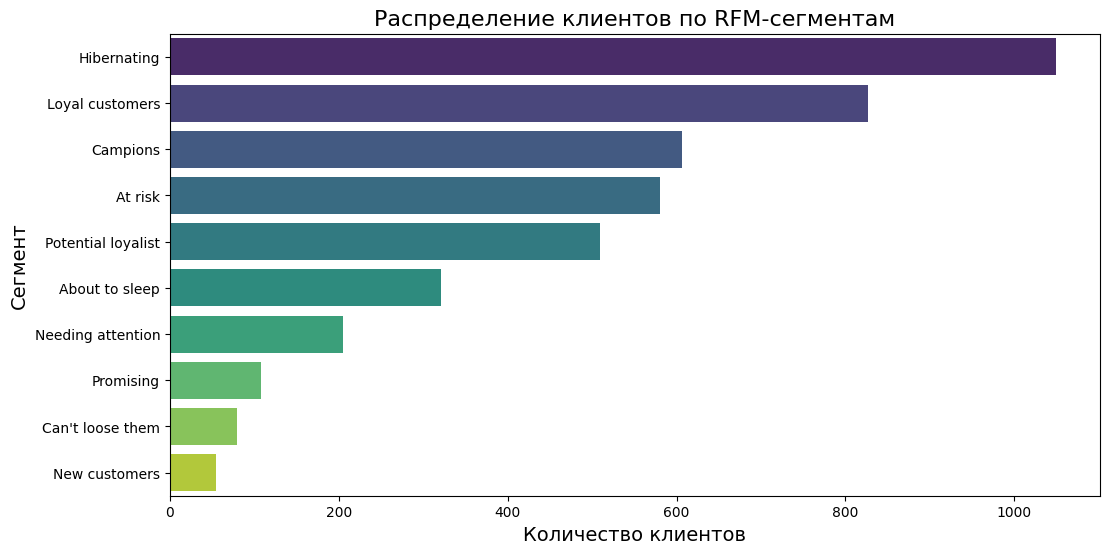

In [ ]:
plt.figure(figsize=(12,6))
segment_counts = rfmTable['rfm_segment'].value_counts()

sns.barplot(x=segment_counts.values, y=segment_counts.index, palette="viridis")
plt.title('Распределение клиентов по RFM-сегментам', fontsize=16)
plt.xlabel('Количество клиентов', fontsize=14)
plt.ylabel('Сегмент', fontsize=14)
plt.show()

Из графика можно выделить: доминирующие группы,
наиболее ценные сегменты,
проблемные зоны.

Итоги проекта и заключение

Проведенный комплексный анализ данных позволил выявить ключевые закономерности в продажах, клиентском поведении и эффективности товарного ассортимента. На основании исследования сформулированы конкретные рекомендации для оптимизации бизнес-процессов и увеличения прибыли.

Ключевые результаты:

1.	Географический анализ

    84% выручки генерирует Великобритания

    25 стран обеспечивают менее 0.1% дохода каждая
2.	Сезонность

    Пики продаж в ноябре (+36%), сентябре (+47%) и мае (+47%)

    Спад в январе (-25%) и апреле (-28%)
3.	ABC-анализ

    20% товаров (категория A) дают 80% выручки
4.	RFM-анализ

    Выделено 10 клиентских сегментов

    593 VIP-клиента ("Can't loose them") требуют особого внимания

    865 перспективных клиентов ("Potential loyalist").

Оценка выполнения поставленных задач:

1.	Оценка динамики продаж

    Построены графики динамики, выявлены сезонные тренды
2.	Анализ географического распределения

    Определены ключевые рынки, даны рекомендации по оптимизации
3.	ABC-анализ товарного ассортимента

     Товары классифицированы, выявлены проблемные позиции
8.	RFM-сегментация клиентской базы

     Разработана система сегментации с рекомендациями
9.	Выявление сезонных трендов

    Определены пиковые и спадовые периоды.
